[0.00620514 0.00620514 0.02474389 0.02474389 0.02474389 0.05535722
 0.05535722 0.05535722 0.05535722 0.09748381 0.09748381 0.09748381
 0.09748381 0.09748381 0.14985211 0.14985211 0.14985211 0.14985211
 0.14985211 0.14985211 0.00620514 0.20814174 0.20814174 0.27963224
 0.27963225 0.20814174 0.27963228 0.38061057 0.00620514 0.09748381
 0.09748381 0.00620514 0.00620514 1.52244239 0.77675636 0.62917276
 0.49712406 0.93987905 0.00620514 0.00620514]


Text(0, 0.5, 'Potential (eV)')

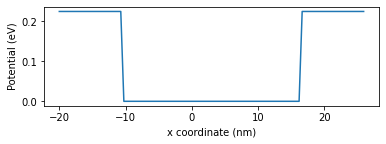

In [ ]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import root
from scipy.optimize import newton

def alpha(E):
    lambdax= np.zeros(N,dtype=complex) # coefficients of exp in diff regions
    for j in range(N):
        lambdax[j]=cmath.sqrt((2*m*(E-V[j]))/(h*h))
    M=np.zeros((N-1,2,2),dtype=complex) # there will be N-1 matrices, assuming x0 to x1 to be barrier region 1 and x(N-1) to x(N) be barrier 2
    for j in range(N-1):
        M[j][0][0]= 0.5*(1+lambdax[j]/lambdax[j+1])*cmath.exp((lambdax[j]-lambdax[j+1])*x[j+1]*1j) # Mj11
        M[j][0][1]= 0.5*(1-lambdax[j]/lambdax[j+1])*cmath.exp(-(lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj12
        M[j][1][0]= 0.5*(1-lambdax[j]/lambdax[j+1])*cmath.exp((lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj21
        M[j][1][1]= 0.5*(1+lambdax[j]/lambdax[j+1])*cmath.exp((-lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj22
    
    Mf=M[0,:] #product of all matrices
    for j in range(1,N-1):
        Mf= np.matmul(M[j,:],Mf)
    
    return abs(Mf[1][1]) # the term alpha_22 in the paper

twell= 26.4*pow(10,-9)
tb= 10*pow(10,-9)
tx= twell + 2*tb # total thickness of well  + both barrier regions  
N= 100 # number of discrete steps
stepx= tx/N # step in x

q=1.6*pow(10,-19) # charge
m=0.067*9.1*pow(10,-31) # mass of electron
h= (6.626/(2*math.pi))*pow(10,-34) # reduced Planck's constant


x=np.zeros(N+1) # array of x points
V= np.zeros(N) # array describing the potential at different x locations

x[0]= -20*pow(10,-9)
for i in range(1,N+1): # defining all x locations and V(x)
    x[i]= x[i-1] + stepx
    #V[i-1]= 0  # implement variation of potential
   

V[0]= 0.225*q  # barrier region on left
Nb= int(tb/stepx)
for i in range(Nb):
    V[i]= 0.225*q


V[N-1]=0.225*q   # barrier region on right
for i in range(N-Nb,N):
    V[i]=0.225*q

plt.subplot(2,1,1)
plt.plot(x[0:N]*pow(10,9),V/q) # potential plot
Eint=np.arange(0.001*q,0.4*q,0.01*q)
#Eint=[0.130*q]
[n]=np.shape(Eint)
E1=np.zeros(n)

for i in range(n):
    #E1[i]=fsolve(alpha,Eint[i],xtol=1.49012e-19)
    temp=root(alpha,Eint[i],method='lm')
    #E1[i]=newton(alpha,Eint[i])
    E1[i]=temp.x

print(E1/q)
plt.xlabel("x coordinate (nm)")
plt.ylabel("Potential (eV)")




/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Eigen level 3')

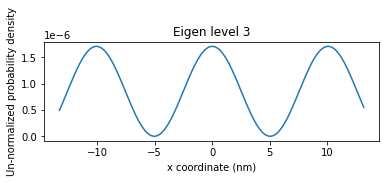

In [ ]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import root
from scipy.optimize import newton

def Matj(E,j):
    j=j-1
    lambdax= np.zeros(N,dtype=complex) # coefficients of exp in diff regions
    for k in range(N):
        lambdax[k]=cmath.sqrt((2*m*(E-V[k]))/(h*h))
    M=np.zeros((2,2),dtype=complex) # there will be N-1 matrices, assuming x0 to x1 to be barrier region 1 and x(N-1) to x(N) be barrier 2
    
    M[0][0]= 0.5*(1+lambdax[j]/lambdax[j+1])*cmath.exp((lambdax[j]-lambdax[j+1])*x[j+1]*1j) # Mj11
    M[0][1]= 0.5*(1-lambdax[j]/lambdax[j+1])*cmath.exp(-(lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj12
    M[1][0]= 0.5*(1-lambdax[j]/lambdax[j+1])*cmath.exp((lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj21
    M[1][1]= 0.5*(1+lambdax[j]/lambdax[j+1])*cmath.exp((-lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj22

    return M 

twell= 26.4*pow(10,-9)
tb= 10*pow(10,-9)
tx= twell + 2*tb # total thickness of well  + both barrier regions  
N= 100 # number of discrete steps
stepx= tx/N # step in x

q=1.6*pow(10,-19) # charge
m=0.067*9.1*pow(10,-31) # mass of electron
h= (6.626/(2*math.pi))*pow(10,-34) # reduced Planck's constant


x=np.zeros(N+1) # array of x points
V= np.zeros(N) # array describing the potential at different x locations

x[0]= -23.2*pow(10,-9)

for i in range(1,N+1): # defining all x locations and V(x)
    x[i]= x[i-1] + stepx
    #V[i-1]= 0  # implement variation of potential
   

V[0]= 0.225*q  # barrier region on left
Nb= int(tb/stepx)
for i in range(Nb):
    V[i]= 0.225*q


V[N-1]=0.225*q   # barrier region on right
for i in range(N-Nb,N):
    V[i]=0.225*q



#plt.subplot(2,1,1)
#plt.plot(x[0:N]*pow(10,9),V/q)
#plt.xlabel("x coordinate (nm)")
#plt.ylabel("Potential (eV)")
Eig=0.0553*q

xarr=np.arange(x[0],x[0]+tx,0.1*pow(10,-9))
[nx]=np.shape(xarr)
Psi=np.zeros(nx,dtype='complex')
A=np.zeros(N,dtype='complex')
B=np.zeros(N,dtype='complex')
A[0]= 0
B[0]= 1
temp=[[1+1j,1+1j],[1+1j,1+1j]]
tmp=int(stepx/(0.1*pow(10,-9)))
stepl= xarr[2]-xarr[1]
sum=0

for l in range(tmp+1):
    lambdaxi=cmath.sqrt((2*m*(Eig-V[0]))/(h*h))
    Psi[l]= pow(abs(A[0]*cmath.exp(1j*lambdaxi*xarr[l])+ B[0]*cmath.exp(-1j*lambdaxi*xarr[l])),2)
    sum=sum+stepl*Psi[l]

for l in range(tmp+1,nx-tmp):
    i= math.floor((xarr[l]-x[0])/stepx)
    temp=Matj(Eig,i)
    A[i]= temp[0][0]*A[i-1]+temp[0][1]*B[i-1]
    B[i]= temp[1][0]*A[i-1]+temp[1][1]*B[i-1]
    lambdaxi=cmath.sqrt((2*m*(Eig-V[i]))/(h*h))
    Psi[l]= pow(abs(A[i]*cmath.exp(1j*lambdaxi*xarr[l])+ B[i]*cmath.exp(-1j*lambdaxi*xarr[l])),2)
    sum=sum+ stepl*Psi[l]
    
plt.subplot(2,1,2)
Nr=int(tb/stepl)
plt.plot(xarr[Nr:nx-Nr]*pow(10,9),Psi[Nr:nx-Nr])
plt.xlabel("x coordinate (nm)")
plt.ylabel("Un-normalized probability density")
plt.title("Eigen level 3")



[0.17004943 0.17004943 0.4        0.17004943 0.17004943 0.17004943
 0.17004943 0.17004943 0.17004943 0.40000001 0.40000001 0.4
 0.4       ]


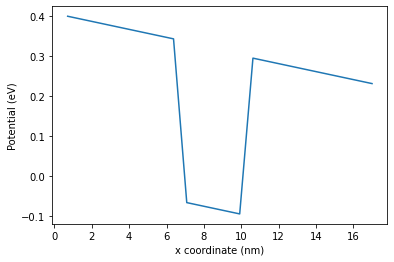

In [ ]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import root
from scipy.optimize import newton

def alpha(E):
    lambdax= np.zeros(N,dtype=complex) # coefficients of exp in diff regions
    for j in range(N):
        lambdax[j]=cmath.sqrt((2*m*(E-V[j]))/(h*h))
    M=np.zeros((N-1,2,2),dtype=complex) # there will be N-1 matrices, assuming x0 to x1 to be barrier region 1 and x(N-1) to x(N) be barrier 2
    for j in range(N-1):
        M[j][0][0]= 0.5*(1+lambdax[j]/lambdax[j+1])*cmath.exp((lambdax[j]-lambdax[j+1])*x[j+1]*1j) # Mj11
        M[j][0][1]= 0.5*(1-lambdax[j]/lambdax[j+1])*cmath.exp(-(lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj12
        M[j][1][0]= 0.5*(1-lambdax[j]/lambdax[j+1])*cmath.exp((lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj21
        M[j][1][1]= 0.5*(1+lambdax[j]/lambdax[j+1])*cmath.exp((-lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj22
    
    Mf=M[0,:] #product of all matrices
    for j in range(1,N-1):
        Mf= np.matmul(M[j,:],Mf)
    
    return abs(Mf[1][1]) # the term alpha_22 in the paper, check whether it should be 00 or 11 (left to right confusion)

tx= 17*pow(10,-9) # total thickness of well
N= 24 # number of discrete steps
stepx= tx/N # step in x

q=1.6*pow(10,-19) # charge
m=0.02*9.1*pow(10,-31) # mass of electron
h= (6.626/(2*math.pi))*pow(10,-34) # reduced Planck's constant


x=np.zeros(N+1) # array of x points
V= np.zeros(N) # array describing the potential at different x locations

x[0]=0
for i in range(1,N+1): # defining all x locations and V(x)
    x[i]= x[i-1] + stepx
   
Eapp= 100*pow(10,5)

V[0] = 0.4*q
for i in range(1,int(7.08*pow(10,-9)/stepx)):
    V[i]=V[i-1]-q*Eapp*stepx

V[int(7.08*pow(10,-9)/stepx)] = -0.067*q
for i in range(1+int(7.08*pow(10,-9)/stepx),int(10*pow(10,-9)/stepx)):
    V[i]=V[i-1] - Eapp*q*stepx

V[int(10*pow(10,-9)/stepx)] = 0.295*q

for i in range(int(10*pow(10,-9)/stepx)+1,N):
    V[i]=V[i-1]-q*Eapp*stepx

#print(V/q)
plt.plot(x[1:N+1]*pow(10,9),V/q)
plt.xlabel("x coordinate (nm)")
plt.ylabel("Potential (eV)")
Eint=np.arange(-0.1*q,0.4*q,0.04*q)
n=np.shape(Eint)[0]
#print(Eint)
E1=np.zeros(n)

for i in range(n):
    #E1[i]=fsolve(alpha,Eint[i])
    E1[i]=root(alpha,Eint[i],method='lm').x
    #E1[i]=newton(alpha,Eint[i])
    #E1 = temp.x
print(E1/q)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Eigen level 1')

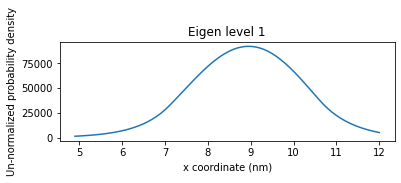

In [ ]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import root
from scipy.optimize import newton

def Matj(E,j):
    j=j-1
    lambdax= np.zeros(N,dtype=complex) # coefficients of exp in diff regions
    for k in range(N):
        lambdax[k]=cmath.sqrt((2*m*(E-V[k]))/(h*h))
    M=np.zeros((2,2),dtype=complex) # there will be N-1 matrices, assuming x0 to x1 to be barrier region 1 and x(N-1) to x(N) be barrier 2
    
    M[0][0]= 0.5*(1+lambdax[j]/lambdax[j+1])*cmath.exp((lambdax[j]-lambdax[j+1])*x[j+1]*1j) # Mj11
    M[0][1]= 0.5*(1-lambdax[j]/lambdax[j+1])*cmath.exp(-(lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj12
    M[1][0]= 0.5*(1-lambdax[j]/lambdax[j+1])*cmath.exp((lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj21
    M[1][1]= 0.5*(1+lambdax[j]/lambdax[j+1])*cmath.exp((-lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj22

    return M # the term alpha_22 in the paper, check whether it should be 00 or 11 (left to right confusion)

tx= 17*pow(10,-9) # total thickness of well
N= 24 # number of discrete steps
stepx= tx/N # step in x

q=1.6*pow(10,-19) # charge
m=0.067*9.1*pow(10,-31) # mass of electron
h= (6.626/(2*math.pi))*pow(10,-34) # reduced Planck's constant


x=np.zeros(N+1) # array of x points
V= np.zeros(N) # array describing the potential at different x locations

x[0]=0
for i in range(1,N+1): # defining all x locations and V(x)
    x[i]= x[i-1] + stepx
    #V[i-1]= 0  # implement variation of potential
   
Eapp= 100*pow(10,5)

V[0] = 0.4*q
for i in range(1,10):
    V[i]=V[i-1]-0.0072*q

V[10] = -0.067*q
for i in range(11,15):
    V[i]=V[i-1] - 0.00825*q

V[15] = 0.295*q
for i in range(16,24):
    V[i]=V[i-1]-0.0086*q

#print(V/q)
#plt.subplot(2,1,1)
#plt.plot(x[1:N+1],V/q)
Eint=np.arange(-0.1*q,0.4*q,0.04*q)
n=np.shape(Eint)[0]
#print(Eint)
E1=np.zeros(n)
Eig=0.0687*q

xarr=np.arange(x[0],x[0]+tx,0.1*pow(10,-9))
[nx]=np.shape(xarr)
Psi=np.zeros(nx,dtype='complex')
A=np.zeros(N,dtype='complex')
B=np.zeros(N,dtype='complex')
A[0]= 0
B[0]= 1
tmp=int(stepx/(0.1*pow(10,-9)))

for l in range(tmp+1):
    lambdaxi=cmath.sqrt((2*m*(Eig-V[0]))/(h*h))
    Psi[l]= pow(abs(A[0]*cmath.exp(1j*lambdaxi*xarr[l])+ B[0]*cmath.exp(-1j*lambdaxi*xarr[l])),2)

for l in range(tmp+1,nx-tmp):
    i= math.floor((xarr[l]-x[0])/stepx)
    temp=Matj(Eig,i)
    A[i]= temp[0][0]*A[i-1]+temp[0][1]*B[i-1]
    B[i]= temp[1][0]*A[i-1]+temp[1][1]*B[i-1]
    lambdaxi=cmath.sqrt((2*m*(Eig-V[i]))/(h*h))
    Psi[l]= pow(abs(A[i]*cmath.exp(1j*lambdaxi*xarr[l])+ B[i]*cmath.exp(-1j*lambdaxi*xarr[l])),2)
      
plt.subplot(2,1,2)
tb= 5*pow(10,-9)
Nr= int(tb/(0.1*pow(10,-9)))
plt.plot(xarr[Nr:nx-Nr]*pow(10,9),Psi[Nr:nx-Nr])
plt.xlabel("x coordinate (nm)")
plt.ylabel("Un-normalized probability density")
plt.title("Eigen level 1")

    

[0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.  0.  0.  0.  0.  0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4]
[-1.60e-20 -9.60e-21 -3.20e-21  3.20e-21  9.60e-21  1.60e-20  2.24e-20
  2.88e-20  3.52e-20  4.16e-20  4.80e-20  5.44e-20  6.08e-20]
[0.1505926 0.1505926 0.1505926 0.1505926 0.1505926 0.1505926 0.1505926
 0.1505926 0.1505926 0.1505926 0.1505926 0.1505926 0.1505926]


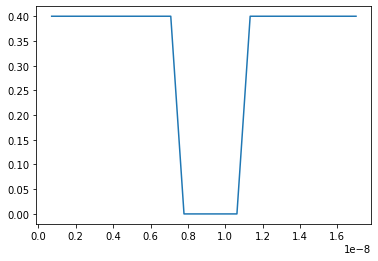

In [ ]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import root
from scipy.optimize import newton

def alpha(E):
    lambdax= np.zeros(N,dtype=complex) # coefficients of exp in diff regions
    for j in range(N):
        lambdax[j]=cmath.sqrt((2*m*(E-V[j]))/(h*h))
    M=np.zeros((N-1,2,2),dtype=complex) # there will be N-1 matrices, assuming x0 to x1 to be barrier region 1 and x(N-1) to x(N) be barrier 2
    for j in range(N-1):
        M[j][0][0]= 0.5*(1+lambdax[j]/lambdax[j+1])*cmath.exp((lambdax[j]-lambdax[j+1])*x[j+1]*1j) # Mj11
        M[j][0][1]= 0.5*(1-lambdax[j]/lambdax[j+1])*cmath.exp(-(lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj12
        M[j][1][0]= 0.5*(1-lambdax[j]/lambdax[j+1])*cmath.exp((lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj21
        M[j][1][1]= 0.5*(1+lambdax[j]/lambdax[j+1])*cmath.exp((-lambdax[j]+lambdax[j+1])*x[j+1]*1j) # Mj22
    
    Mf=M[0,:] #product of all matrices
    for j in range(1,N-1):
        Mf= np.matmul(M[j,:],Mf)
    
    return abs(Mf[1][1]) # the term alpha_22 in the paper, check whether it should be 00 or 11 (left to right confusion)

tx= 17*pow(10,-9) # total thickness of well
N= 24 # number of discrete steps
stepx= tx/N # step in x

q=1.6*pow(10,-19) # charge
m=0.067*9.1*pow(10,-31) # mass of electron
h= (6.626/(2*math.pi))*pow(10,-34) # reduced Planck's constant


x=np.zeros(N+1) # array of x points
V= np.zeros(N) # array describing the potential at different x locations

x[0]=0
for i in range(1,N+1): # defining all x locations and V(x)
    x[i]= x[i-1] + stepx
    #V[i-1]= 0  # implement variation of potential
   
Eapp= 100*pow(10,5)

V[0] = 0.4*q
for i in range(1,10):
    V[i]=V[i-1]-0.0072*q*0

V[10] = 0#-0.067*q
for i in range(11,15):
    V[i]=V[i-1] - 0.00825*q*0

V[15] = 0.4*q #0.295*q
for i in range(16,24):
    V[i]=V[i-1]-0.0086*q*0

print(V/q)
plt.plot(x[1:N+1],V/q)
Eint=np.arange(-0.1*q,0.4*q,0.04*q)
n=np.shape(Eint)[0]
print(Eint)
E1=np.zeros(n)

for i in range(n):
    #E1[i]=fsolve(alpha,Eint[i])
    E1[i]=root(alpha,Eint[i],method='lm').x
    #E1[i]=newton(alpha,Eint[i])
    #E1 = temp.x
print(E1/q)

Text(0, 0.5, 'Potential (eV)')

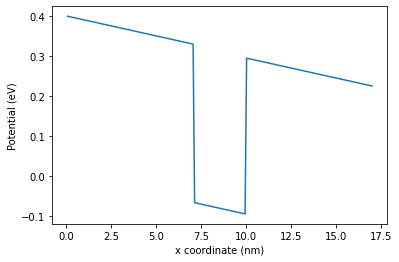

In [ ]:
tx= 17*pow(10,-9) # total thickness of well
N= 200 # number of discrete steps
stepx= tx/N # step in x

q=1.6*pow(10,-19) # charge
m=0.02*9.1*pow(10,-31) # mass of electron
h= (6.626/(2*math.pi))*pow(10,-34) # reduced Planck's constant


x=np.zeros(N+1) # array of x points
V= np.zeros(N) # array describing the potential at different x locations

x[0]=0
for i in range(1,N+1): # defining all x locations and V(x)
    x[i]= x[i-1] + stepx
   
Eapp= 100*pow(10,5)

V[0] = 0.4*q
for i in range(1,int(7.08*pow(10,-9)/stepx)):
    V[i]=V[i-1]-q*Eapp*stepx

V[int(7.08*pow(10,-9)/stepx)] = -0.067*q
for i in range(1+int(7.08*pow(10,-9)/stepx),int(10*pow(10,-9)/stepx)):
    V[i]=V[i-1] - Eapp*q*stepx

V[int(10*pow(10,-9)/stepx)] = 0.295*q

for i in range(int(10*pow(10,-9)/stepx)+1,N):
    V[i]=V[i-1]-q*Eapp*stepx

#print(V/q)
plt.plot(x[1:N+1]*pow(10,9),V/q)
plt.xlabel("x coordinate (nm)")
plt.ylabel("Potential (eV)")